# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print(cities[0])

yellowknife


In [4]:
# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# Test a city to see json output
city = "portland"
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 45.52,
        "lon": -122.67
    },
    "dt": 1555724498,
    "id": 5746545,
    "main": {
        "humidity": 87,
        "pressure": 1014,
        "temp": 54.03,
        "temp_max": 55.99,
        "temp_min": 52
    },
    "name": "Portland",
    "rain": {
        "1h": 0.72
    },
    "sys": {
        "country": "US",
        "id": 5321,
        "message": 0.0077,
        "sunrise": 1555679889,
        "sunset": 1555729263,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        },
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 10.29
    }
}


In [7]:
# Include a print log of each city as it'sbeing processed (with the city number and city name).

In [8]:
# set up lists to hold reponse info
temp = []
max_temp = []
name = []
country = []
cloudiness = []
date = []
humidity = []
coord_lat = []
coord_lon = []
wind = []
count = 1

# Loop through the list of cities and perform a request for data on each
# for city in cities[:200]:
for city in cities:

    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        name.append(city)
#         city_number.append(response['id'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        coord_lat.append(response['coord']['lat'])
        coord_lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        print(f"The temperature information received for {city} & City Number: {count}")
        count += 1
    except:
        print("skip city")


The temperature information received for yellowknife & City Number: 1
The temperature information received for jamestown & City Number: 2
The temperature information received for bluff & City Number: 3
The temperature information received for raudeberg & City Number: 4
The temperature information received for belaya gora & City Number: 5
The temperature information received for lumphat & City Number: 6
The temperature information received for georgetown & City Number: 7
The temperature information received for nikolskoye & City Number: 8
The temperature information received for palana & City Number: 9
The temperature information received for san cristobal & City Number: 10
skip city
The temperature information received for shimoda & City Number: 11
The temperature information received for vaini & City Number: 12
skip city
The temperature information received for puerto ayora & City Number: 13
The temperature information received for albany & City Number: 14
The temperature information 

The temperature information received for sohag & City Number: 120
The temperature information received for cabo san lucas & City Number: 121
The temperature information received for ahipara & City Number: 122
The temperature information received for rawson & City Number: 123
The temperature information received for cayenne & City Number: 124
The temperature information received for dunn & City Number: 125
The temperature information received for dikson & City Number: 126
The temperature information received for esperance & City Number: 127
The temperature information received for great falls & City Number: 128
The temperature information received for fukue & City Number: 129
The temperature information received for butaritari & City Number: 130
The temperature information received for katete & City Number: 131
The temperature information received for cherskiy & City Number: 132
The temperature information received for daru & City Number: 133
The temperature information received for cam

The temperature information received for flagstaff & City Number: 236
The temperature information received for quesnel & City Number: 237
The temperature information received for tessalit & City Number: 238
The temperature information received for ilheus & City Number: 239
The temperature information received for pangody & City Number: 240
The temperature information received for parana & City Number: 241
The temperature information received for kirovsk & City Number: 242
The temperature information received for crotone & City Number: 243
The temperature information received for pontianak & City Number: 244
skip city
The temperature information received for arica & City Number: 245
The temperature information received for mitsamiouli & City Number: 246
The temperature information received for hay river & City Number: 247
The temperature information received for karratha & City Number: 248
The temperature information received for iqaluit & City Number: 249
The temperature information re

The temperature information received for karnobat & City Number: 353
The temperature information received for tiarei & City Number: 354
skip city
The temperature information received for mindelo & City Number: 355
The temperature information received for kamenka & City Number: 356
The temperature information received for dunedin & City Number: 357
The temperature information received for deputatskiy & City Number: 358
The temperature information received for nouadhibou & City Number: 359
The temperature information received for provost & City Number: 360
The temperature information received for maceio & City Number: 361
skip city
The temperature information received for owerri & City Number: 362
The temperature information received for katsuura & City Number: 363
The temperature information received for uray & City Number: 364
The temperature information received for jinka & City Number: 365
The temperature information received for prince rupert & City Number: 366
The temperature infor

The temperature information received for kloulklubed & City Number: 471
The temperature information received for kudahuvadhoo & City Number: 472
The temperature information received for ponta delgada & City Number: 473
The temperature information received for rosoman & City Number: 474
The temperature information received for amga & City Number: 475
The temperature information received for macamic & City Number: 476
The temperature information received for miram shah & City Number: 477
The temperature information received for abalak & City Number: 478
skip city
The temperature information received for atar & City Number: 479
The temperature information received for adeje & City Number: 480
The temperature information received for ambilobe & City Number: 481
The temperature information received for stuttgart & City Number: 482
The temperature information received for port hawkesbury & City Number: 483
The temperature information received for talakan & City Number: 484
The temperature in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
output_path = os.path.join("..", "Instructions", "output_data-cities.csv")
city_data = [[cities], [temp ], [max_temp], 
             [country], [cloudiness], 
             [date], [humidity], [coord_lat], 
             [coord_lon], [wind]]
output_path = os.path.join("output_data-cities.csv")
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerows(city_data)

In [10]:
#Turn Cities/Lng&Lat List into dataframe
cities_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": coord_lat,
    "Lng": coord_lon,
    "Max Temp": max_temp,
    "Wind Speed": wind
} 
cities_pd = pd.DataFrame(cities_dict)
cities_pd.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,90,CA,1555722000,74,62.45,-114.38,33.80,11.41
1,jamestown,72,AU,1555724825,15,-33.21,138.60,86.61,16.55
2,bluff,0,AU,1555724825,34,-23.58,149.07,86.99,15.17
3,raudeberg,0,NO,1555724704,61,61.99,5.14,53.01,10.29
4,belaya gora,0,RU,1555724826,71,68.54,146.19,20.08,1.07
5,lumphat,19,KH,1555724826,54,13.50,106.97,92.73,6.44
6,georgetown,20,GY,1555722000,94,6.80,-58.16,77.00,6.93
7,nikolskoye,0,RU,1555724737,52,59.70,30.79,44.60,6.71
8,palana,91,RU,1555724827,82,59.08,159.95,32.73,10.36
9,san cristobal,90,EC,1555724743,93,-0.39,-78.55,57.20,2.24


In [11]:
cities_pd.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

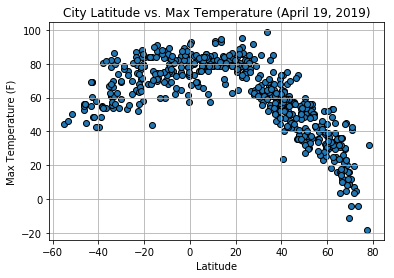

In [12]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (April 19, 2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

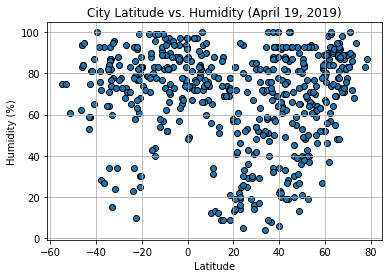

In [13]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (April 19, 2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsHumid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

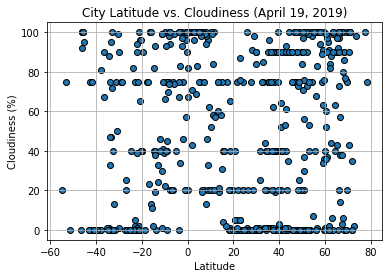

In [14]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (April 19, 2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

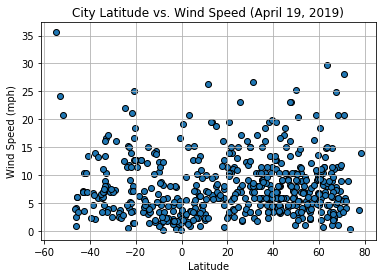

In [15]:
# Build a scatter plot for each data type
plt.scatter(cities_pd["Lat"], cities_pd["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (April 19, 2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatvsWindSpeed.png")

# Show plot
plt.show()